In [1]:
from sklearn.datasets import load_breast_cancer
import pandas as pd

# Load the Breast Cancer dataset and convert it into a DataFrame
data = load_breast_cancer()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target

# Explore the dataset
print(df.head())

   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  ...  worst texture  worst perimeter  worst area  \
0             

In [2]:
from sklearn.model_selection import train_test_split

# Handle missing values (example: filling missing values with the median)
df.fillna(df.median(), inplace=True)

# Split the data into features and labels
X = df.drop('target', axis=1)
y = df['target']

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [3]:
from sklearn.tree import DecisionTreeClassifier

# Train the decision tree model
tree = DecisionTreeClassifier(ccp_alpha=0.0, random_state=42)
tree.fit(X_train, y_train)

# Make predictions on the test data
y_pred = tree.predict(X_test)

In [4]:
from sklearn.metrics import accuracy_score

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Decision Tree Accuracy: {accuracy * 100:.2f}%")

Decision Tree Accuracy: 94.74%


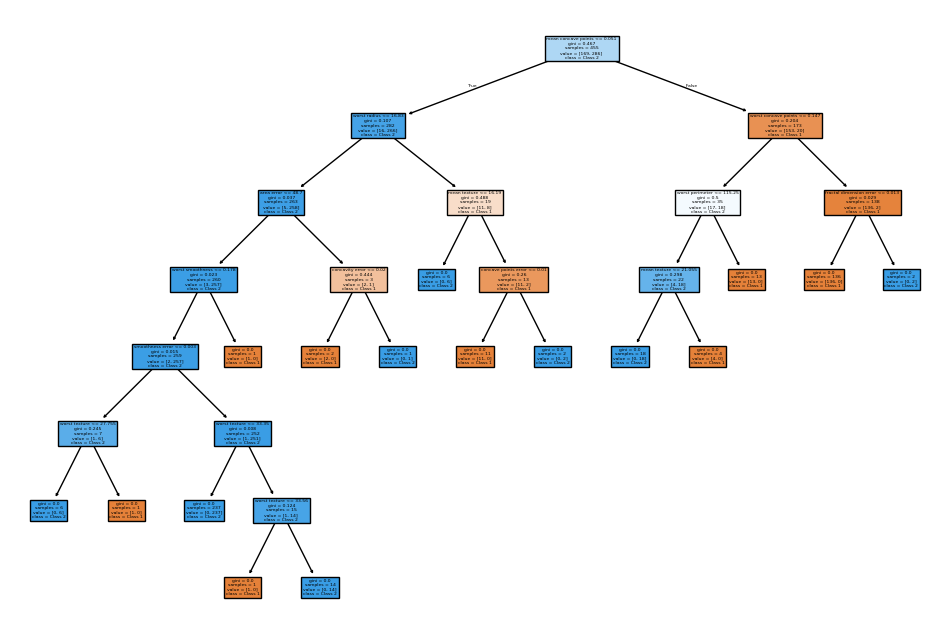

In [5]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Plot the decision tree
plt.figure(figsize=(12,8))
plot_tree(tree, filled=True, feature_names=X.columns, class_names=['Class 1', 'Class 2'])
plt.show()